# 均衡差异模型

## 概述
本讲座介绍了一个大学-高中工资差距模型，其中"培养"大学毕业生的时间扮演了关键角色。

米尔顿·弗里德曼发明了这个模型，用来研究美国牙医和医生收入的差异是竞争性劳动力市场的结果，还是政府与医生专业组织合作施加的入行障碍的结果。

詹妮弗·伯恩斯的著作{cite}`Burns_2023`第4章描述了米尔顿·弗里德曼与西蒙·库兹涅茨的合作研究，最终导致了{cite}`kuznets1939incomes`和{cite}`friedman1954incomes`的发表。

将弗里德曼的应用映射到我们的模型中，可以将我们的高中生视为弗里德曼的牙医，将我们的大学毕业生视为弗里德曼的医生。

我们的呈现是"不完整的"，因为它基于一个单一方程，这个方程将是更完整模型中一组均衡条件的一部分。

这个"均衡差异"方程确定了一个大学-高中工资比率，使高中毕业工人和大学毕业工人的现值相等。

这个想法是，终身收入会以某种方式调整，使新高中毕业工人对是否上大学或立即工作无差别。
（更完整模型中的"其他方程"的作用将是描述什么会调整以实现这个结果。）

我们的模型只是相对工资率"均衡差异"理论的一个例子，这类理论至少可以追溯到亚当·斯密的《国富论》{cite}`smith2010wealth`。

在本讲座的大部分内容中，我们将只使用线性代数的数学工具，特别是矩阵乘法和矩阵求逆。

然而，在讲座接近尾声时，我们会使用微积分，以防读者想看看如何通过计算偏导数来更简洁地呈现一些发现。

这样做还能让我们展示Python在进行微积分计算方面有多么出色！

但如果你不懂微积分，我们的线性代数工具肯定足够了。

像往常一样，我们先导入一些Python模块。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
FONTPATH = "fonts/SourceHanSerifSC-SemiBold.otf"
mpl.font_manager.fontManager.addfont(FONTPATH)
plt.rcParams['font.family'] = ['Source Han Serif SC']

## 无差异条件

关键思想是，大学入学级别的工资溢价必须调整，以使代表性工人对上大学和不上大学无差别。

设：

* $R > 1$ 为一期债券的总回报率

* $t = 0, 1, 2, \ldots T$ 表示一个人工作或上大学的年数

* $0$ 表示一个人如果不上大学可以工作的高中毕业后的第一个时期

* $T$ 表示一个人工作的最后一个时期

* $w_t^h$ 为高中毕业生在 $t$ 时的工资

* $w_t^c$ 为大学毕业生在 $t$ 时的工资

* $\gamma_h > 1$ 为高中毕业生工资的（总）增长率，使得
$ w_t^h = w_0^h \gamma_h^t$

* $\gamma_c > 1$ 为大学毕业生工资的（总）增长率，使得
$ w_t^c = w_0^c \gamma_c^t$

* $D$ 为上大学的前期货币成本

现在我们计算新高中毕业生如果：

  * 立即工作并赚取无大学教育者的工资
  * 上大学四年，毕业后赚取大学毕业生的工资

所能获得的现值

### 高中教育工人的现值

如果某人高中毕业后立即工作，并在 $t=0, 1, 2, \ldots, T$ 的 $T+1$ 年内工作，她赚取的现值为：

$$
h_0 = \sum_{t=0}^T R^{-t} w_t^h = w_0^h \left[ \frac{1 - (R^{-1} \gamma_h)^{T+1} }{1 - R^{-1} \gamma_h } \right] \equiv w_0^h A_h 
$$

其中

$$
A_h = \left[ \frac{1 - (R^{-1} \gamma_h)^{T+1} }{1 - R^{-1} \gamma_h } \right].
$$

现值 $h_0$ 是选择不上大学而是立即以高中毕业生的工资开始工作的人在时间 $0$ 开始时的"人力财富"。

### 准备上大学的新高中毕业生的现值

如果某人在 $t=0, 1, 2, 3$ 的四年内上大学，期间收入为 $0$，但在大学毕业后立即工作，并在 $t=4, 5, \ldots ,T$ 的 $T-3$ 年内工作，她赚取的现值为：

$$
c_0 = \sum_{t=4}^T R^{-t} w_t^c = w_0^c (R^{-1} \gamma_c)^4  \left[ \frac{1 - (R^{-1} \gamma_c)^{T-3} }{1 - R^{-1} \gamma_c } \right] \equiv w_0^c A_c
$$

其中

$$
A_c = (R^{-1} \gamma_c)^4  \left[ \frac{1 - (R^{-1} \gamma_c)^{T-3} }{1 - R^{-1} \gamma_c } \right] .
$$ 

现值 $c_0$ 是选择上大学四年然后在 $t=4$ 时以大学毕业生的工资开始工作的人在时间 $0$ 开始时的"人力财富"。

假设大学学费加上四年的食宿费用总计为 $D$，必须在时间 $0$ 支付。

因此，扣除上大学的货币成本后，高中毕业后第一个时期上大学的现值为：

$$ 
c_0 - D
$$

现在我们制定一个纯**均衡差异**模型，用于初始大学-高中工资差距 $\phi$，其中：

$$
w_0^c = \phi w_0^h 
$$

我们假设 $R, \gamma_h, \gamma_c, T$ 以及 $w_0^h$ 是固定参数。

我们首先注意到，纯均衡差异模型断言，大学-高中工资差距 $\phi$ 满足一个"均衡"方程，该方程将不上大学的现值设置为等于上大学的现值：

$$
h_0 = c_0 - D
$$ 

或

$$ 
w_0^h A_h  = \phi w_0^h A_c - D .
$$ (eq:equalize)

这个"无差异条件"是模型的核心。

求解方程 {eq}`eq:equalize` 得到大学工资溢价 $\phi$：

$$
\phi  = \frac{A_h}{A_c} + \frac{D}{w_0^h A_c} .
$$ (eq:wagepremium)

在**免费大学**的特殊情况下，$D =0$。

在这种情况下，上大学的唯一成本是放弃作为高中教育工人的收入。

因此，

$$
\phi  = \frac{A_h}{A_c} . 
$$

我们很快将编写 Python 代码来计算 $\phi$ 并绘制它作为其决定因素的函数图。

但首先，我们将描述我们模型的一种替代解释，这主要只是重新标记变量。

## 重新诠释模型：工人和企业家

我们可以添加一个参数并重新解释变量，以得到一个企业家与工人的模型。

现在让 $h$ 表示"工人"的现值。
我们将企业家的现值定义为：

$$
c_0 = \pi \sum_{t=4}^T R^{-t} w_t^c
$$

其中 $\pi \in (0,1)$ 是企业家的"项目"成功的概率。

对于我们的工人和企业模型，我们将把 $D$ 解释为成为企业家的成本。

这个成本可能包括雇佣工人、办公空间和律师的费用。

我们过去称之为大学、高中工资差距的 $\phi$ 现在变成了
成功企业家收入与工人收入的比率。

我们会发现，随着 $\pi$ 的减少，$\phi$ 会增加，这表明
成为企业家的风险越大，成功项目的回报就必须越高。

## 计算

我们可以通过调整各种参数来做一些有趣的例子，
主要包括 $\gamma_h, \gamma_c, R$。

现在让我们编写一些 Python 代码来计算 $\phi$ 并将其作为某些决定因素的函数进行绘图。

In [2]:
class equalizing_diff:
    """
    均等差异模型的一个类
    """
    
    def __init__(self, R, T, γ_h, γ_c, w_h0, D=0, π=None):
        # 通过设置 π 切换到弱模型
        self.R, self.γ_h, self.γ_c, self.w_h0, self.D = R, γ_h, γ_c, w_h0, D
        self.T, self.π = T, π
    
    def compute_gap(self):
        R, γ_h, γ_c, w_h0, D = self.R, self.γ_h, self.γ_c, self.w_h0, self.D
        T, π = self.T, self.π
        
        A_h = (1 - (γ_h/R)**(T+1)) / (1 - γ_h/R)
        A_c = (1 - (γ_c/R)**(T-3)) / (1 - γ_c/R) * (γ_c/R)**4
        
        # 调整后的模型
        if π!=None:
            A_c = π*A_c 
        
        ϕ = A_h/A_c + D/(w_h0*A_c)
        return ϕ

我们使用向量化而不是循环来构建一些函数，以帮助进行比较静态分析。

对于类的给定实例，我们想在一个参数变化而其他参数保持固定时重新计算 $\phi$。

让我们举个例子。

In [3]:
# ϕ_R
def ϕ_R(mc, R_new):
    mc_new = equalizing_diff(R_new, mc.T, mc.γ_h, mc.γ_c, mc.w_h0, mc.D, mc.π)
    return mc_new.compute_gap()

ϕ_R = np.vectorize(ϕ_R)

# ϕ_γh
def ϕ_γh(mc, γh_new):
    mc_new = equalizing_diff(mc.R, mc.T, γh_new, mc.γ_c, mc.w_h0, mc.D, mc.π)
    return mc_new.compute_gap()

ϕ_γh = np.vectorize(ϕ_γh)

# ϕ_γc
def ϕ_γc(mc, γc_new):
    mc_new = equalizing_diff(mc.R, mc.T, mc.γ_h, γc_new, mc.w_h0, mc.D, mc.π)
    return mc_new.compute_gap()

ϕ_γc = np.vectorize(ϕ_γc)

# ϕ_π
def ϕ_π(mc, π_new):
    mc_new = equalizing_diff(mc.R, mc.T, mc.γ_h, mc.γ_c, mc.w_h0, mc.D, π_new)
    return mc_new.compute_gap()

ϕ_π = np.vectorize(ϕ_π)

In [4]:
# 设定标准参数
R = 1.05
T = 40
γ_h, γ_c = 1.01, 1.01
w_h0 = 1
D = 10

# 创建一个例子
ex1 = equalizing_diff(R=R, T=T, γ_h=γ_h, γ_c=γ_c, w_h0=w_h0, D=D)
gap1 = ex1.compute_gap()

print(gap1)

1.8041412724969135


让我们设想不收取大学学费，然后重新计算 $\phi$。

初始的大学工资溢价应该会降低。

In [5]:
# 免费大学
ex2 = equalizing_diff(R, T, γ_h, γ_c, w_h0, D=0)
gap2 = ex2.compute_gap()
print(gap2)

1.2204649517903732


让我们构建一些图表，展示如果初始大学-高中工资比率 $\phi$ 的某个决定因素发生变化，$\phi$ 将如何改变。

我们先从总利率 $R$ 开始。

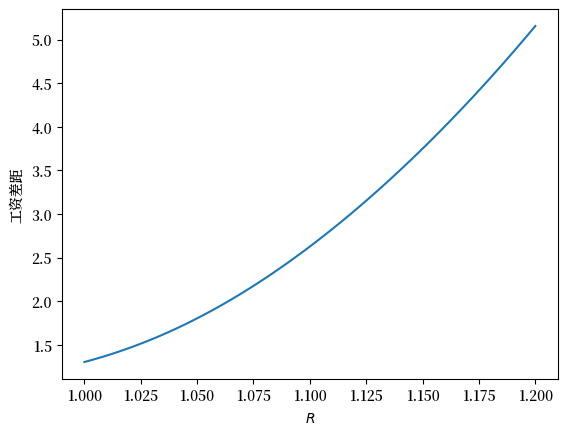

In [6]:
R_arr = np.linspace(1, 1.2, 50)
plt.plot(R_arr, φ_R(ex1, R_arr))
plt.xlabel(r'$R$')
plt.ylabel(r'工资差距')
plt.show()

注意当大学工资增长率 $\gamma_c$ 上升时，初始工资差距是如何下降的。

工资差距下降是为了"平衡"两种职业类型的现值，一种是高中工人，另一种是大学工人。

你能猜到当我们接下来改变高中工资的增长率时，初始工资比率 $\phi$ 会发生什么变化吗？同时保持 $\phi$ 的所有其他决定因素不变。

下图显示了会发生什么。

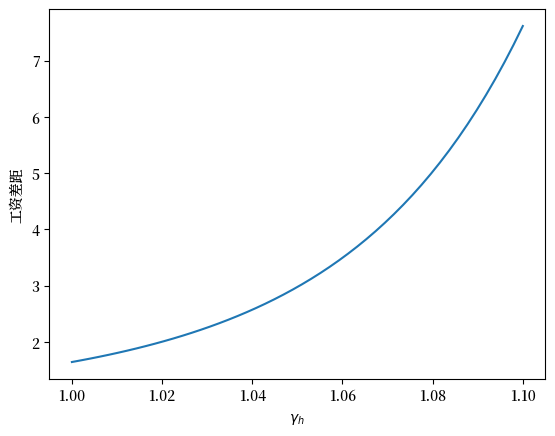

In [7]:
γh_arr = np.linspace(1, 1.1, 50)
plt.plot(γh_arr, φ_γh(ex1, γh_arr))
plt.xlabel(r'$\gamma_h$')
plt.ylabel(r'工资差距')
plt.show()

## 企业家-工人解释

现在让我们采用我们模型的企业家-工人解释。

如果一个新企业成功的概率是 $0.2$，让我们计算成功企业家的初始工资溢价。

In [8]:
# 企业家模型
ex3 = equalizing_diff(R, T, γ_h, γ_c, w_h0, π=0.2)
gap3 = ex3.compute_gap()

print(gap3)

6.102324758951866


现在让我们研究成功企业家的初始工资溢价是如何依赖于成功概率的。

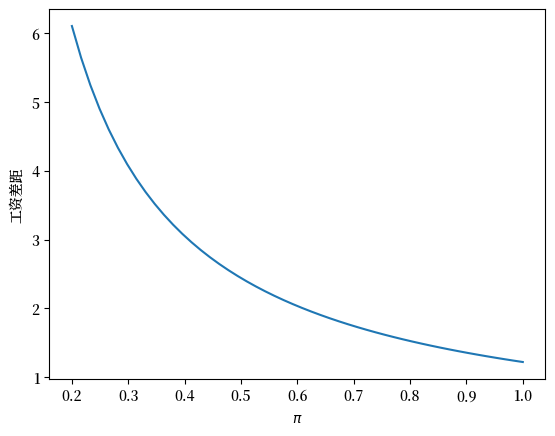

In [9]:
π_arr = np.linspace(0.2, 1, 50)
plt.plot(π_arr, φ_π(ex3, π_arr))
plt.ylabel(r'工资差距')
plt.xlabel(r'$\pi$')
plt.show()

这个图表是不是符合你的猜想呢？

## 微积分的应用

到目前为止，我们只使用了线性代数，这对我们理解模型的运作原理已经足够了。

然而，懂得微积分的人可能会希望我们直接求偏导数。

现在我们就来做这个。

不懂微积分的读者可以不用继续往下读，可以确信应用线性代数已经让我们了解了模型的主要特性。

但对于那些有兴趣了解我们如何让 Python 完成计算偏导数的所有繁重工作的读者，我们现在会说一些相关的内容。

我们将使用 Python 模块 `sympy` 来计算 $\phi$ 对决定它的参数的偏导数。

让我们从 `sympy` 导入关键函数。

In [10]:
from sympy import Symbol, Lambda, symbols

设定符号

In [11]:
γ_h, γ_c, w_h0, D = symbols('\gamma_h, \gamma_h_c, w_0^h, D', real=True)
R, T = Symbol('R', real=True), Symbol('T', integer=True)

设定函数$A_h$

In [12]:
A_h = Lambda((γ_h, R, T), (1 - (γ_h/R)**(T+1)) / (1 - γ_h/R))
A_h

Lambda((\gamma_h, R, T), (1 - (\gamma_h/R)**(T + 1))/(1 - \gamma_h/R))

设定函数 $A_c$

In [13]:
A_c = Lambda((γ_c, R, T), (1 - (γ_c/R)**(T-3)) / (1 - γ_c/R) * (γ_c/R)**4)
A_c

Lambda((\gamma_h_c, R, T), \gamma_h_c**4*(1 - (\gamma_h_c/R)**(T - 3))/(R**4*(1 - \gamma_h_c/R)))

设定 $\phi$

In [14]:
ϕ = Lambda((D, γ_h, γ_c, R, T, w_h0), A_h(γ_h, R, T)/A_c(γ_c, R, T) + D/(w_h0*A_c(γ_c, R, T)))

In [15]:
ϕ

Lambda((D, \gamma_h, \gamma_h_c, R, T, w_0^h), D*R**4*(1 - \gamma_h_c/R)/(\gamma_h_c**4*w_0^h*(1 - (\gamma_h_c/R)**(T - 3))) + R**4*(1 - (\gamma_h/R)**(T + 1))*(1 - \gamma_h_c/R)/(\gamma_h_c**4*(1 - \gamma_h/R)*(1 - (\gamma_h_c/R)**(T - 3))))

我们开始设定默认的参数值。

In [16]:
R_value = 1.05
T_value = 40
γ_h_value, γ_c_value = 1.01, 1.01
w_h0_value = 1
D_value = 10

现在让我们计算 $\frac{\partial \phi}{\partial D}$ 然后测量其在默认值的值

In [17]:
ϕ_D = ϕ(D, γ_h, γ_c, R, T, w_h0).diff(D)
ϕ_D

R**4*(1 - \gamma_h_c/R)/(\gamma_h_c**4*w_0^h*(1 - (\gamma_h_c/R)**(T - 3)))

In [18]:
# 在默认值的值
ϕ_D_func = Lambda((D, γ_h, γ_c, R, T, w_h0), ϕ_D)
ϕ_D_func(D_value, γ_h_value, γ_c_value, R_value, T_value, w_h0_value)

0.0583676320706540

因此，与我们之前的图表一样，我们发现提高 $R$ 会增加初始大学工资溢价 $\phi$。

计算 $\frac{\partial \phi}{\partial T}$ 并在默认参数下评估它

In [19]:
ϕ_T = ϕ(D, γ_h, γ_c, R, T, w_h0).diff(T)
ϕ_T

D*R**4*(\gamma_h_c/R)**(T - 3)*(1 - \gamma_h_c/R)*log(\gamma_h_c/R)/(\gamma_h_c**4*w_0^h*(1 - (\gamma_h_c/R)**(T - 3))**2) - R**4*(\gamma_h/R)**(T + 1)*(1 - \gamma_h_c/R)*log(\gamma_h/R)/(\gamma_h_c**4*(1 - \gamma_h/R)*(1 - (\gamma_h_c/R)**(T - 3))) + R**4*(\gamma_h_c/R)**(T - 3)*(1 - (\gamma_h/R)**(T + 1))*(1 - \gamma_h_c/R)*log(\gamma_h_c/R)/(\gamma_h_c**4*(1 - \gamma_h/R)*(1 - (\gamma_h_c/R)**(T - 3))**2)

In [20]:
# 在默认值的值
ϕ_T_func = Lambda((D, γ_h, γ_c, R, T, w_h0), ϕ_T)
ϕ_T_func(D_value, γ_h_value, γ_c_value, R_value, T_value, w_h0_value)

-0.00973478032996598

我们发现提高 $T$ 会降低初始大学工资溢价 $\phi$。

这是因为大学毕业生现在有更长的职业生涯来"收回"他们为上大学付出的时间和其他成本。

让我们计算 $\frac{\partial \phi}{\partial \gamma_h}$ 并在默认参数下评估它。

In [21]:
ϕ_γ_h = ϕ(D, γ_h, γ_c, R, T, w_h0).diff(γ_h)
ϕ_γ_h

-R**4*(\gamma_h/R)**(T + 1)*(1 - \gamma_h_c/R)*(T + 1)/(\gamma_h*\gamma_h_c**4*(1 - \gamma_h/R)*(1 - (\gamma_h_c/R)**(T - 3))) + R**3*(1 - (\gamma_h/R)**(T + 1))*(1 - \gamma_h_c/R)/(\gamma_h_c**4*(1 - \gamma_h/R)**2*(1 - (\gamma_h_c/R)**(T - 3)))

In [22]:
# 在默认值的值
ϕ_γ_h_func = Lambda((D, γ_h, γ_c, R, T, w_h0), ϕ_γ_h)
ϕ_γ_h_func(D_value, γ_h_value, γ_c_value, R_value, T_value, w_h0_value)

17.8590485545256

我们发现提高 $\gamma_h$ 会增加初始大学工资溢价 $\phi$，这与我们之前的图形分析结果一致。

计算 $\frac{\partial \phi}{\partial \gamma_c}$ 并在默认参数值下对其进行数值评估

In [23]:
ϕ_γ_c = ϕ(D, γ_h, γ_c, R, T, w_h0).diff(γ_c)
ϕ_γ_c

D*R**4*(\gamma_h_c/R)**(T - 3)*(1 - \gamma_h_c/R)*(T - 3)/(\gamma_h_c**5*w_0^h*(1 - (\gamma_h_c/R)**(T - 3))**2) - 4*D*R**4*(1 - \gamma_h_c/R)/(\gamma_h_c**5*w_0^h*(1 - (\gamma_h_c/R)**(T - 3))) - D*R**3/(\gamma_h_c**4*w_0^h*(1 - (\gamma_h_c/R)**(T - 3))) + R**4*(\gamma_h_c/R)**(T - 3)*(1 - (\gamma_h/R)**(T + 1))*(1 - \gamma_h_c/R)*(T - 3)/(\gamma_h_c**5*(1 - \gamma_h/R)*(1 - (\gamma_h_c/R)**(T - 3))**2) - 4*R**4*(1 - (\gamma_h/R)**(T + 1))*(1 - \gamma_h_c/R)/(\gamma_h_c**5*(1 - \gamma_h/R)*(1 - (\gamma_h_c/R)**(T - 3))) - R**3*(1 - (\gamma_h/R)**(T + 1))/(\gamma_h_c**4*(1 - \gamma_h/R)*(1 - (\gamma_h_c/R)**(T - 3)))

In [24]:
# 在默认值的值
ϕ_γ_c_func = Lambda((D, γ_h, γ_c, R, T, w_h0), ϕ_γ_c)
ϕ_γ_c_func(D_value, γ_h_value, γ_c_value, R_value, T_value, w_h0_value)

-31.6486401973376

我们发现提高 $\gamma_c$ 会降低初始大学工资溢价 $\phi$，这与我们之前的图形分析结果一致。

让我们计算 $\frac{\partial \phi}{\partial R}$ 并在默认参数值下对其进行数值评估

In [25]:
ϕ_R = ϕ(D, γ_h, γ_c, R, T, w_h0).diff(R)
ϕ_R

-D*R**3*(\gamma_h_c/R)**(T - 3)*(1 - \gamma_h_c/R)*(T - 3)/(\gamma_h_c**4*w_0^h*(1 - (\gamma_h_c/R)**(T - 3))**2) + 4*D*R**3*(1 - \gamma_h_c/R)/(\gamma_h_c**4*w_0^h*(1 - (\gamma_h_c/R)**(T - 3))) + D*R**2/(\gamma_h_c**3*w_0^h*(1 - (\gamma_h_c/R)**(T - 3))) + R**3*(\gamma_h/R)**(T + 1)*(1 - \gamma_h_c/R)*(T + 1)/(\gamma_h_c**4*(1 - \gamma_h/R)*(1 - (\gamma_h_c/R)**(T - 3))) - R**3*(\gamma_h_c/R)**(T - 3)*(1 - (\gamma_h/R)**(T + 1))*(1 - \gamma_h_c/R)*(T - 3)/(\gamma_h_c**4*(1 - \gamma_h/R)*(1 - (\gamma_h_c/R)**(T - 3))**2) + 4*R**3*(1 - (\gamma_h/R)**(T + 1))*(1 - \gamma_h_c/R)/(\gamma_h_c**4*(1 - \gamma_h/R)*(1 - (\gamma_h_c/R)**(T - 3))) - R**2*\gamma_h*(1 - (\gamma_h/R)**(T + 1))*(1 - \gamma_h_c/R)/(\gamma_h_c**4*(1 - \gamma_h/R)**2*(1 - (\gamma_h_c/R)**(T - 3))) + R**2*(1 - (\gamma_h/R)**(T + 1))/(\gamma_h_c**3*(1 - \gamma_h/R)*(1 - (\gamma_h_c/R)**(T - 3)))

In [26]:
# 在默认值的值
ϕ_R_func = Lambda((D, γ_h, γ_c, R, T, w_h0), ϕ_R)
ϕ_R_func(D_value, γ_h_value, γ_c_value, R_value, T_value, w_h0_value)

13.2642738659429

我们发现提高总利率 $R$ 会增加初始大学工资溢价 $\phi$，这与我们之前的图形分析结果一致。